In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('data-banknote-authentication (1).xls')
df.head()


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df = df.dropna()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


### Train Test Split

In [5]:
x = pd.get_dummies(df.drop('class', axis=1), drop_first=True)
y = df['class']

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

### **Random Forest Classifier**

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
model = RandomForestClassifier(n_estimators=10, random_state=101, oob_score=True)
model

RandomForestClassifier(n_estimators=10, oob_score=True, random_state=101)

In [9]:
model.fit(x_train, y_train)

C:\Users\kaustubh hande\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(n_estimators=10, oob_score=True, random_state=101)

In [10]:
y_pred = model.predict(x_test)

### Model Evaluation

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [12]:
cm = confusion_matrix(y_test, y_pred)

In [13]:
round(accuracy_score(y_test, y_pred), 2)

1.0

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       262
           1       0.99      1.00      0.99       191

    accuracy                           1.00       453
   macro avg       0.99      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453



In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

<Figure size 1000x600 with 0 Axes>

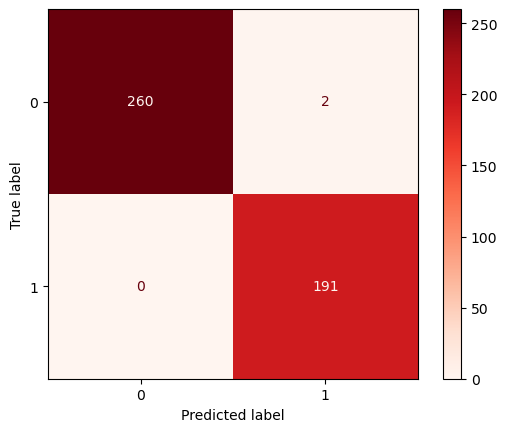

In [16]:
plt.figure(figsize=(10,6))
clf = ConfusionMatrixDisplay(confusion_matrix=cm)
clf.plot(cmap=plt.cm.Reds)
plt.show()

#### Feature Importances

In [17]:
print(model.feature_importances_)

[0.54581354 0.24316744 0.15726687 0.05375215]


In [18]:
model.feature_names_in_

array(['variance', 'skewness', 'curtosis', 'entropy'], dtype=object)

In [19]:
model.oob_score

True

In [20]:
model.oob_score_

0.9738846572361263

### Optimal values of estimators

In [23]:
test_error_rate = [] 
for i in range(1,20):
    model_1 = RandomForestClassifier(n_estimators=i)
    model_1.fit(x_train,y_train)

    y_pred_test = model_1.predict(x_test)
    test_error = round((1-accuracy_score(y_test, y_pred_test)), 2)
    test_error_rate.append(test_error)

print(test_error_rate)

[0.02, 0.02, 0.02, 0.01, 0.0, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]


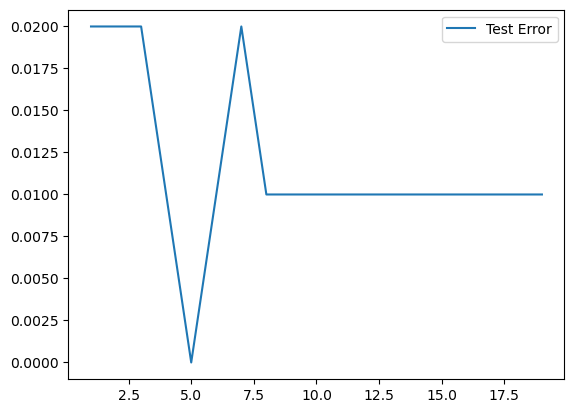

In [24]:
plt.plot(range(1,20),test_error_rate, label='Test Error')
plt.legend()